- Using Logistic Regression, KNN, Tree, Random Forest, XGBoost, and SVM models.
- KFolds that are repeated and KFolds that have been grouped together.
- SMOTE and ADASYN are three random oversamplers, and they all work.
- Metrics for Classification.

the data set includes credit card transactions made by European cardholders over a period of two days in September 2013 out of total of 2,84,807 transactions, 492 were fraudulent this data set is highly unbalanced with positive class(frauds) accounting for 0.172% of the total transactions. The data set has also been modified with principal component analysis to maintain confidentiality apart from time and amount all the other features(V-1, V-2, V-3, up to V28) are the principal components obtained using PCA. the feature time contains the second elapsed between the first transaction in the data set and the subsequent transactions. the feature amount is a transaction amount. the feature class represents the class labelling and it takes the value of one in classes of fraud and zero in others.

In [ ]:
# importing the libraries
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report, average_precision_score, precision_recall_curve

from sklearn.linear_model import LogisticRegression, Ridge, Lasso, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

# **Exploratory Data Analysis**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/deep learning/projects/creditcard.csv')
df.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Checking distribution of numerical values inthe dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# Class is our target variable
# checking the distribution of the target variable
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


<Axes: ylabel='Class'>

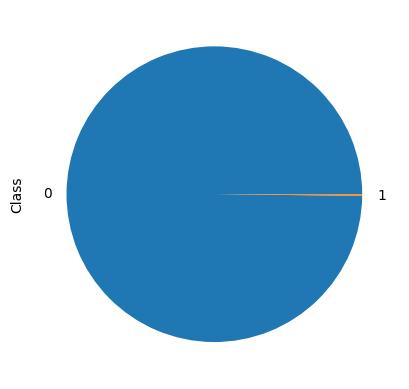

In [ ]:
# checking the class distribution of the target variable in percentage
print((df.groupby('Class')['Class'].count()/df['Class'].count())*100)

# creating pie plot
((df.groupby('Class')['Class'].count()/df['Class'].count())*100).plot.pie()

In [ ]:
# checking the correlation
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


In [ ]:
# as there are many numbers to look into lets plot a heatmap
plt.figure(figsize=(20,18))
sns.heatmap(corr, annot=True)
plt.show

# **Feature Engineering**
derving new features from the existing

In [ ]:
# as the time is given in relative fashion, timedelta which represents a duration, difference between 2 time
Delta_time = pd.to_timedelta(df['Time'], unit='s')

# creating derived columns mins and hours
df['Time_Day'] = (Delta_time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_time.dt.components.minutes).astype(int)

In [ ]:
# Drop unnecessary columns, we will drop Trime(as we derived the Day/Hour/Minutes from the time column)
df.drop('Time', axis=1, inplace=True)

# we will keep only hour, as I realized day/minutes might not be very useful
df.drop(['Time_Day', 'Time_Min'], axis=1, inplace=True)

# **Splitting the dataset to train and test**

In [ ]:
y = df['Class']
x = df.drop(['Class'],axis=1)

In [ ]:
x.head(1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=100)

In [ ]:
x_test.shape

(56962, 30)

In [ ]:
x_train.shape

(227845, 30)

# **Model Building**

In [ ]:
# creating a dataframe, that will store results for all the models we will be using, this will help us compare which model's performance is better than other
df_results = pd.DataFrame(columns = ['Methodology', 'Model', 'Accuracy','roc_value', 'threshold'])

In [ ]:
# helper function to plot confusion matrix
def plot_confusion_matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  categoryNames = ['Not-Fraud', 'Fraud']
  plt.title('Confusion Matrix')
  plt.ylabel('true value')
  plt.xlabel('predicted')
  ticks = np.arange(len(categoryNames))
  plt.xticks(ticks, categoryNames, rotation=45)
  plt.yticks(ticks, categoryNames)
  s = [['TN', 'FP'], ['FN', 'TP']]

  for i in range(2):
    for j in range(2):
      plt.text(j,i, str(s[i][j]) + " = " + str(cm[i][j]), fontsize=10)
  plt.show()

**common fucntion for each of the model types, this function covers model creation and evaluation**

In [ ]:
# Created a function to fit and predict on a logistic regression model for both L1 and L2
def Logistic_model(df_results, Methodology, x_train, y_train, x_test, y_test):

  # Logistic Regression
  from sklearn import linear_model
  from sklearn.model_selection import KFold

  num_c = list(np.power(10.0, np.arange(-10,10))) #used for Cs(inverse of regularization strength)
  cv_num = KFold(n_splits=10, shuffle=True, random_state=42)  #cross validation, used kfold

  searchCV_l2 = linear_model.LogisticRegressionCV(
      Cs = num_c
      ,penalty = 'l2'
      ,scoring = 'roc_auc'
      ,cv = cv_num
      ,random_state = 42
      ,max_iter = 10000
      ,fit_intercept = True
      ,solver = 'saga'
      ,tol = 10
  )

  searchCV_l1 = linear_model.LogisticRegressionCV(
      Cs = num_c
      ,penalty = 'l1'
      ,scoring = 'roc_auc'
      ,cv = cv_num
      ,random_state = 42
      ,max_iter = 10000
      ,fit_intercept = True
      ,solver = 'saga'
      ,tol = 10
  )

  searchCV_l1.fit(x_train, y_train)
  searchCV_l2.fit(x_train, y_train)
  print('max auc_roc for l1: ', searchCV_l1.scores_[1].mean(axis=0).max())
  print('max auc_roc for l2: ', searchCV_l2.scores_[1].mean(axis=0).max())

  print("Parameters for l1 regularisations: ")
  print(searchCV_l1.coef_)
  print(searchCV_l1.intercept_)
  print(searchCV_l1.scores_)

  print("Parameters for l2 regularisations: ")
  print(searchCV_l2.coef_)
  print(searchCV_l2.intercept_)
  print(searchCV_l2.scores_)


  # prediction
  y_pred_l1 = searchCV_l1.predict(x_test)
  y_pred_l2 = searchCV_l2.predict(x_test)

  y_pred_prob_l1 = searchCV_l1.predict_proba(x_test)[:,1]
  y_pred_prob_l2 = searchCV_l2.predict_proba(x_test)[:,1]


  #Evaluation part
  # accuracy of l2/l1 model
  Accuracy_l2 = metrics.accuracy_score(y_pred = y_pred_l2, y_true = y_test)
  Accuracy_l1 = metrics.accuracy_score(y_pred = y_pred_l1, y_true = y_test)

  print("accuracy of the logistic model with l2 regularization: {0}" .format(Accuracy_l2))
  print("confusion matrix")
  plot_confusion_matrix(y_test, y_pred_l2)
  print("classification report")
  print(classification_report(y_test, y_pred_l2))

  print("accuracy of the logistic model with l1 regularization: {0}" .format(Accuracy_l1))
  print("confusion matrix")
  plot_confusion_matrix(y_test, y_pred_l1)
  print("classification report")
  print(classification_report(y_test, y_pred_l1))

  # L2 ROC value and threshold
  l2_roc_value = roc_auc_score(y_test, y_pred_prob_l2)
  print("l2 roc_value: {0}".format(l2_roc_value))

  fpr_l2, tpr_l2, thresholds_l2 = metrics.roc_curve(y_test, y_pred_prob_l2)
  threshold_l2 = thresholds_l2[np.argmax(tpr_l2 - fpr_l2)]
  print("l2 threshold: {0}".format(threshold_l2))

  roc_auc_l2 = metrics.auc(fpr_l2, tpr_l2)
  print("roc for the test dataset", '{:.1%}'.format(roc_auc_l2))
  plt.plot(fpr_l2, tpr_l2, label="Test, auc= " + str(roc_auc_l2))
  plt.legend(loc=4)
  plt.show()


  # Append results to DataFrame
  new_result = pd.DataFrame({
      'Methodology': [Methodology],
      'Model': ['logistic model with l2 regularization'],
      'Accuracy': [Accuracy_l2],
      'roc_value': [l2_roc_value],
      'threshold': [threshold_l2]
  })
  df_results = pd.concat([df_results, new_result], ignore_index=True)



  # L1 ROC value and threshold
  l1_roc_value = roc_auc_score(y_test, y_pred_prob_l1)
  print("l1 roc_value: {0}".format(l1_roc_value))

  fpr_l1, tpr_l1, thresholds_l1 = metrics.roc_curve(y_test, y_pred_prob_l1)
  threshold_l1 = thresholds_l1[np.argmax(tpr_l1 - fpr_l1)]
  print("l1 threshold: {0}".format(threshold_l1))

  roc_auc_l1 = metrics.auc(fpr_l1, tpr_l1)
  print("roc for the test dataset", '{:.1%}'.format(roc_auc_l1))
  plt.plot(fpr_l1, tpr_l1, label="Test, auc= " + str(roc_auc_l1))
  plt.legend(loc=4)
  plt.show()

  new_result = pd.DataFrame({
      'Methodology': [Methodology],
      'Model': ['logistic model with l1 regularization'],
      'Accuracy': [Accuracy_l1],
      'roc_value': [l1_roc_value],
      'threshold': [threshold_l1]
  })
  df_results = pd.concat([df_results, new_result], ignore_index=True)
  return df_results

In [ ]:
# fuction to fit and predict on KNN model
def KNN_model(df_results, Methodology, x_train, y_train, x_test, y_test):
  # KNN
  knn = KNeighborsClassifier(n_neighbors=5, n_jobs=16)
  knn.fit(x_train, y_train)
  score = knn.score(x_test, y_test)
  print("score: {0}".format(score))

  #accracy
  y_pred_knn = knn.predict(x_test)
  Accuracy_knn = metrics.accuracy_score(y_pred = y_pred_knn, y_true = y_test)
  print("accuracy of the KNN model: {0}" .format(Accuracy_knn))

  print("confusion matrix")
  plot_confusion_matrix(y_test, y_pred_knn)
  print("classification report")
  print(classification_report(y_test, y_pred_knn))

  knn_prob = knn.predict_proba(x_test)[:,1]

  # calculate roc_auc
  knn_roc_value = roc_auc_score(y_test, knn_prob)
  print("knn roc_value: {0}".format(knn_roc_value))
  fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(y_test, knn_prob)
  threshold = thresholds_knn[np.argmax(tpr_knn - fpr_knn)]
  print("knn threshold: {0}".format(threshold))

  roc_auc_knn = metrics.auc(fpr_knn, tpr_knn)
  print("roc for the test dataset", '{:.1%}'.format(roc_auc_knn))
  plt.plot(fpr_knn, tpr_knn, label="Test, auc= " + str(roc_auc_knn))
  plt.legend(loc=4)
  plt.show()

  new_result = pd.DataFrame({
      'Methodology': [Methodology],
      'Model': ['KNN'],
      'Accuracy': [Accuracy_knn],
      'roc_value': [knn_roc_value],
      'threshold': [threshold]
  })
  df_results = pd.concat([df_results, new_result], ignore_index=True)
  return df_results

In [ ]:
# function to fit and predict Tree models for both gini and entropy
def tree_model(df_results, Methodology, x_train, y_train, x_test, y_test):
  criteria = ['gini', 'entropy']
  scores = {}  # dictionary

  for c in criteria:
    tree = DecisionTreeClassifier(criterion=c, random_state=42)
    tree.fit(x_train, y_train)
    y_pred_tree = tree.predict(x_test)
    test_score = tree.score(x_test, y_test)
    tree_prob = tree.predict_proba(x_test)[:,1]
    tree_roc_value = roc_auc_score(y_test, tree_prob)
    scores = test_score
    print("score: {0}".format(test_score))

    print("confusion matrix")
    plot_confusion_matrix(y_test, y_pred_tree)
    print("classification report")
    print(classification_report(y_test, y_pred_tree))

    print("tree roc_value: {0}".format(tree_roc_value))

    fpr_tree, tpr_tree, thresholds_tree = metrics.roc_curve(y_test, tree_prob)
    threshold = thresholds_tree[np.argmax(tpr_tree - fpr_tree)]
    print("tree threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr_tree, tpr_tree)
    print("roc for the test dataset", '{:.1%}'.format(roc_auc))
    plt.plot(fpr_tree, tpr_tree, label="Test, auc= " + str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    new_result = pd.DataFrame({
        'Methodology': [Methodology],
        'Model': ['Tree model with {0} criteria'.format(c)],
        'Accuracy': [test_score],
        'roc_value': [tree_roc_value],
        'threshold': [threshold]
    })
    df_results = pd.concat([df_results, new_result], ignore_index=True)
  return df_results

In [ ]:
# function to fit and predict on a XGBoost model
def XGBoost_model(df_results, Methodology, x_train, y_train, x_test, y_test):
  # XGBoost
  xgb_model = XGBClassifier(random_state=42)
  xgb_model.fit(x_train, y_train)
  y_pred_xgb = xgb_model.predict(x_test)

  xgb_test_score = xgb_model.score(x_test, y_test)
  print("score: {0}".format(xgb_test_score))

  print("confusion matrix")
  plot_confusion_matrix(y_test, y_pred_xgb)
  print("classification report")
  print(classification_report(y_test, y_pred_xgb))

  # probability for each class
  xgb_prob = xgb_model.predict_proba(x_test)[:,1]

  # calculate roc_auc
  xgb_roc_value = roc_auc_score(y_test, xgb_prob)

  print("xgb roc_value: {0}".format(xgb_roc_value))
  fpr_xgb, tpr_xgb, thresholds_xgb = metrics.roc_curve(y_test, xgb_prob)
  threshold = thresholds_xgb[np.argmax(tpr_xgb - fpr_xgb)]
  print("xgb threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr_xgb, tpr_xgb)
  print("roc for the test dataset", '{:.1%}'.format(roc_auc))
  plt.plot(fpr_xgb, tpr_xgb, label="Test, auc= " + str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  new_result = pd.DataFrame({
      'Methodology': [Methodology],
      'Model': ['XGBoost'],
      'Accuracy': [xgb_test_score],
      'roc_value': [xgb_roc_value],
      'threshold': [threshold]
  })
  df_results = pd.concat([df_results, new_result], ignore_index=True)
  return df_results


**we can use similarly random forest models, support vector machines**

# **Performing Cross Validation with RepeatedKFold**

In [ ]:
# lets perform RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# x - feature, y - target
for train_index, test_index in rkf.split(x):
  print("Train:", train_index, "Test:", test_index)
  x_train_cv, x_test_cv = x.iloc[train_index], x.iloc[test_index]
  y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
  # we will get 50 results as each repeat is splitted 5 times

Train: [     0      1      2 ... 284804 284805 284806] Test: [     3      8     10 ... 284791 284792 284793]
Train: [     0      1      2 ... 284804 284805 284806] Test: [     5      7     20 ... 284797 284800 284802]
Train: [     0      1      2 ... 284802 284803 284804] Test: [    11     14     15 ... 284799 284805 284806]
Train: [     0      2      3 ... 284802 284805 284806] Test: [     1     13     17 ... 284794 284803 284804]
Train: [     1      3      5 ... 284804 284805 284806] Test: [     0      2      4 ... 284796 284798 284801]
Train: [     0      2      3 ... 284803 284804 284806] Test: [     1      4      7 ... 284792 284793 284805]
Train: [     0      1      2 ... 284804 284805 284806] Test: [    11     14     17 ... 284788 284800 284802]
Train: [     0      1      3 ... 284803 284805 284806] Test: [     2      5      9 ... 284796 284798 284804]
Train: [     0      1      2 ... 284804 284805 284806] Test: [     6      8     22 ... 284794 284795 284797]
Train: [     1     

Logistic Regression with L1 and L2 regularization
max auc_roc for l1:  0.5634255634079339
max auc_roc for l2:  0.5615013787824022
Parameters for l1 regularisations: 
[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.         -0.01572824 -0.00329028]]
[-0.00220737]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.47395063,
        0.46724337, 0.46419257, 0.462571  , 0.46144885, 0.46033159,
        0.45950249, 0.45883824, 0.45821916, 0.45750241, 0.45700788,
        0.45651335, 0.45614337, 0.45569036, 0.4554144 , 0.45518118],
       [0.5       , 0.5       , 0.5       , 0.45742299, 0.45962393,
        0.45525002, 0.45307372, 0.452204  , 0.45162197, 0.4511971 ,
        0.45021417, 0.44970006, 0.44937108, 0.44894089, 0.44853999,

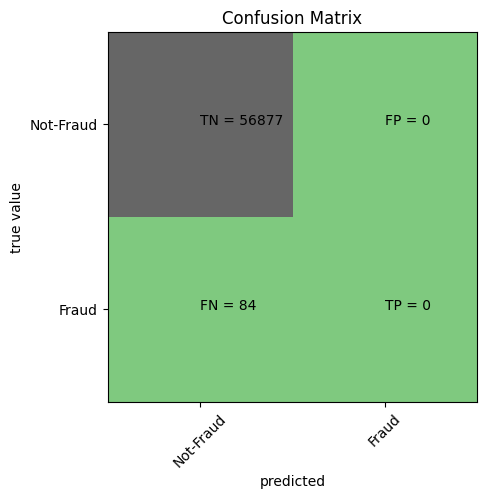

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56877
           1       0.00      0.00      0.00        84

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

accuracy of the logistic model with l1 regularization: 0.9985253067888555
confusion matrix


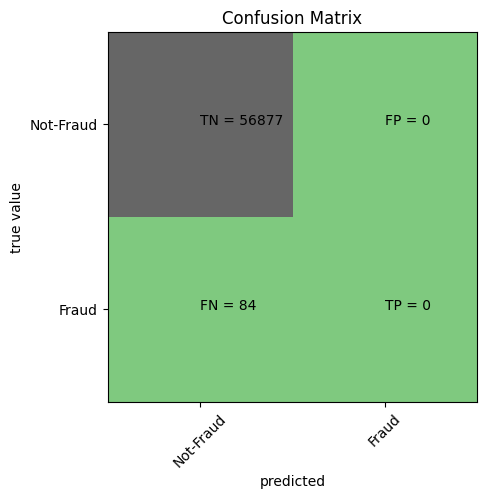

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56877
           1       0.00      0.00      0.00        84

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.570575226240082
l2 threshold: 0.49841984996345057
roc for the test dataset 57.1%


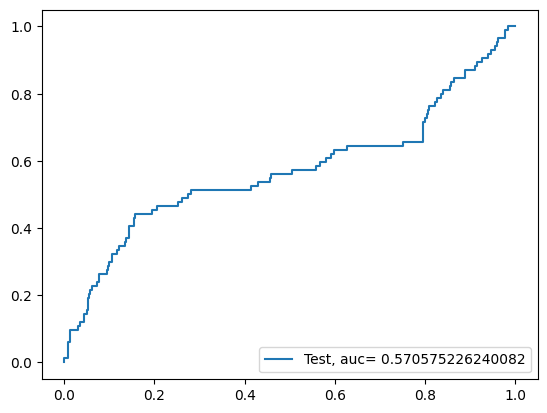

l1 roc_value: 0.5701485536458373
l1 threshold: 0.4774349017065098
roc for the test dataset 57.0%


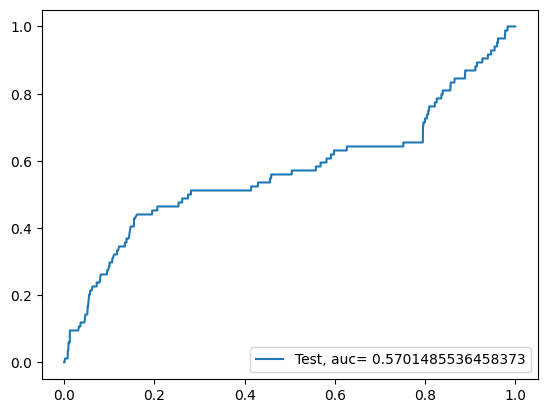

time taken: ----- 88.67820692062378 seconds ----- 
............................................................
KNN
score: 0.999280209265989
accuracy of the KNN model: 0.999280209265989
confusion matrix


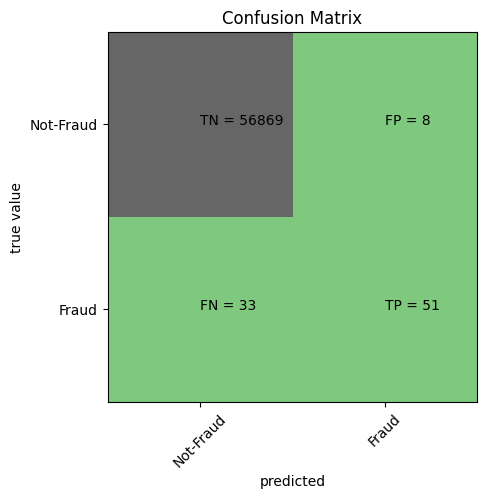

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56877
           1       0.86      0.61      0.71        84

    accuracy                           1.00     56961
   macro avg       0.93      0.80      0.86     56961
weighted avg       1.00      1.00      1.00     56961

knn roc_value: 0.8688612310440994
knn threshold: 0.2
roc for the test dataset 86.9%


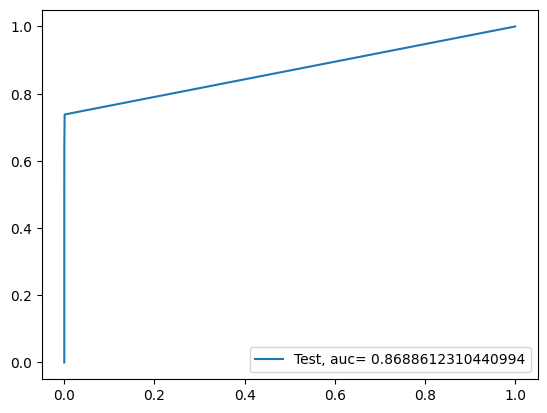

time taken: ----- 228.6191873550415 seconds ----- 
............................................................
Decision tree model, 'gini' and 'entropy'
score: 0.9993153210091115
confusion matrix


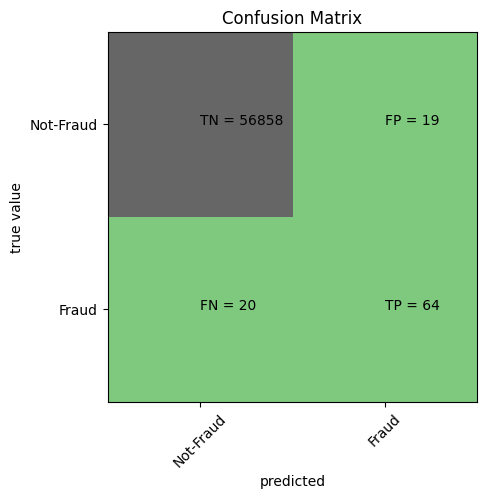

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56877
           1       0.77      0.76      0.77        84

    accuracy                           1.00     56961
   macro avg       0.89      0.88      0.88     56961
weighted avg       1.00      1.00      1.00     56961

tree roc_value: 0.8807853538588282
tree threshold: 1.0
roc for the test dataset 88.1%


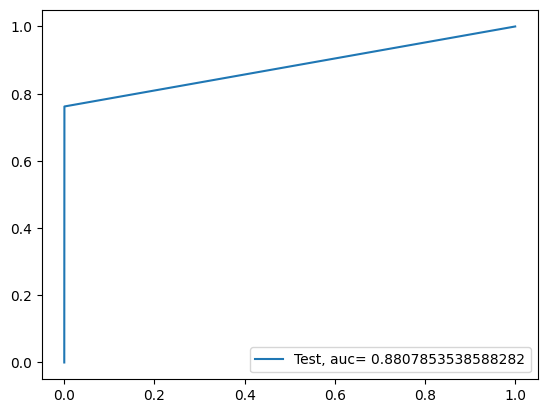

score: 0.9992977651375503
confusion matrix


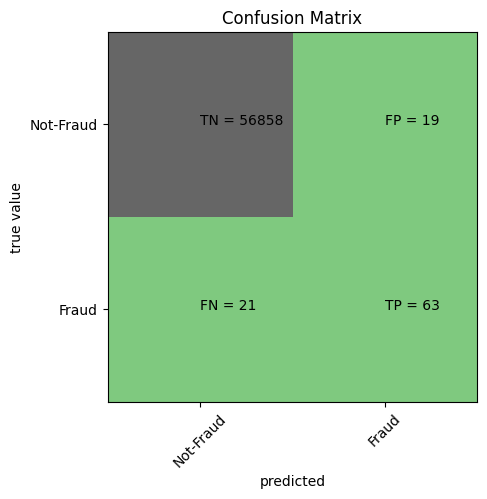

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56877
           1       0.77      0.75      0.76        84

    accuracy                           1.00     56961
   macro avg       0.88      0.87      0.88     56961
weighted avg       1.00      1.00      1.00     56961

tree roc_value: 0.8748329729064471
tree threshold: 1.0
roc for the test dataset 87.5%


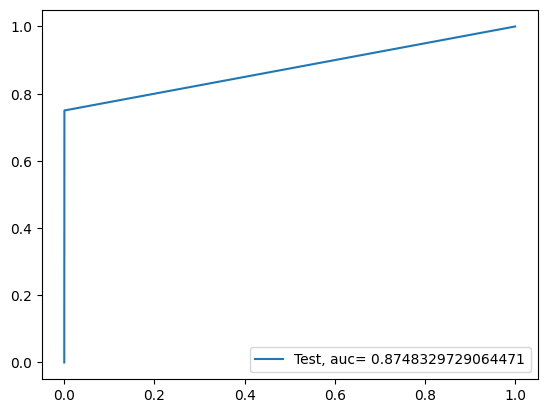

time taken: ----- 38.4687614440918 seconds ----- 
............................................................
XGBoost
score: 0.9996137708256526
confusion matrix


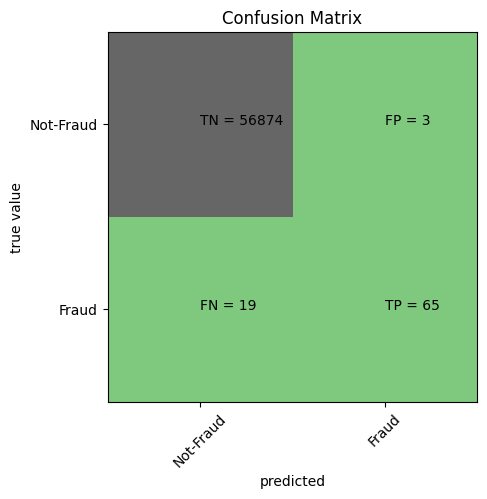

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56877
           1       0.96      0.77      0.86        84

    accuracy                           1.00     56961
   macro avg       0.98      0.89      0.93     56961
weighted avg       1.00      1.00      1.00     56961

xgb roc_value: 0.9771717080383149
xgb threshold: 0.00018977060972247273
roc for the test dataset 97.7%


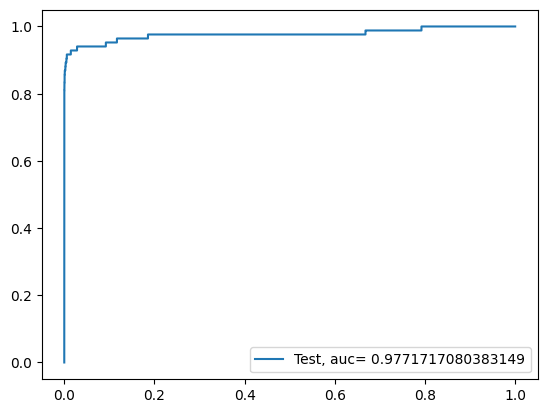

time taken: ----- 4.975998878479004 seconds ----- 
............................................................


In [62]:
# now we will call each model, and compare the results
print("Logistic Regression with L1 and L2 regularization")
start_time = time.time()
df_results = Logistic_model(df_results, "RepeatedKFold", x_train_cv, y_train_cv, x_test_cv, y_test_cv)
print("time taken: ----- %s seconds ----- "% (time.time() - start_time))
print("."*60)

# KNN
print("KNN")
start_time = time.time()
df_results = KNN_model(df_results, "RepeatedKFold", x_train_cv, y_train_cv, x_test_cv, y_test_cv)
print("time taken: ----- %s seconds ----- "% (time.time() - start_time))
print("."*60)

# Decision tree model, 'gini' and 'entropy'
print("Decision tree model, 'gini' and 'entropy'")
start_time = time.time()
df_results = tree_model(df_results, "RepeatedKFold", x_train_cv, y_train_cv, x_test_cv, y_test_cv)
print("time taken: ----- %s seconds ----- "% (time.time() - start_time))
print("."*60)

# XGBoost
print("XGBoost")
start_time = time.time()
df_results = XGBoost_model(df_results, "RepeatedKFold", x_train_cv, y_train_cv, x_test_cv, y_test_cv)
print("time taken: ----- %s seconds ----- "% (time.time() - start_time))
print("."*60)

In [63]:
df_results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold,logistic model with l2 regularization,0.998525,0.570575,0.498420
1,RepeatedKFold,logistic model with l1 regularization,0.998525,0.570149,0.477435
2,RepeatedKFold,KNN,0.999280,0.868861,0.200000
3,RepeatedKFold,Tree model with gini criteria,0.999315,0.880785,1.000000
4,RepeatedKFold,Tree model with entropy criteria,0.999298,0.874833,1.000000
5,RepeatedKFold,XGBoost,0.999614,0.977172,0.000190


# **Perform Cross Validation with StratifiedKFold**

In [64]:
# lets perform StratifiedKFold and check the results
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# x - feature, y - target
for train_index, test_index in skf.split(x,y):
  print("Train:", train_index, "Test:", test_index)
  x_train_skf_cv, x_test_skf_cv = x.iloc[train_index], x.iloc[test_index]
  y_train_skf_cv, y_test_skf_cv = y.iloc[train_index], y.iloc[test_index]

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]


Logistic Regression with L1 and L2 regularization
max auc_roc for l1:  0.5584614890392482
max auc_roc for l2:  0.5593114272212807
Parameters for l1 regularisations: 
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -7.75607014e-10
   0.00000000e+00 -6.71701695e-09  0.00000000e+00 -1.55059003e-10
  -1.21295022e-08  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -2.78148440e-02 -1.06266850e-02]]
[-0.00396572]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.48565823,
        0.47891937, 0.47538254, 0.47322043, 0.47217544, 0.47117104,
        0.47025682, 0.46959398, 0.46908107, 0.46859183, 0.4681319 ,
        0.46754346, 0.46718837, 0.46708353, 0.46676001, 0.46654695],
       [0.5       , 0.5       , 0.5       , 0

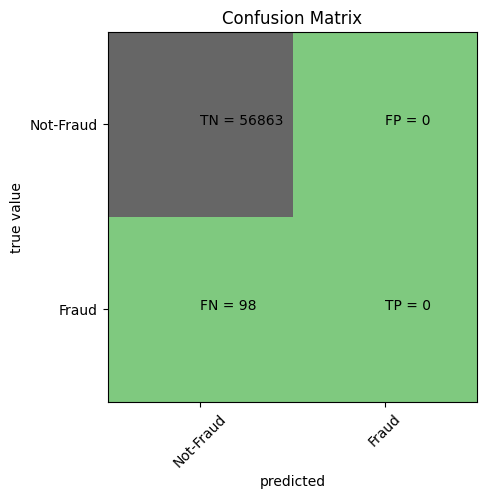

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

accuracy of the logistic model with l1 regularization: 0.9982795245869981
confusion matrix


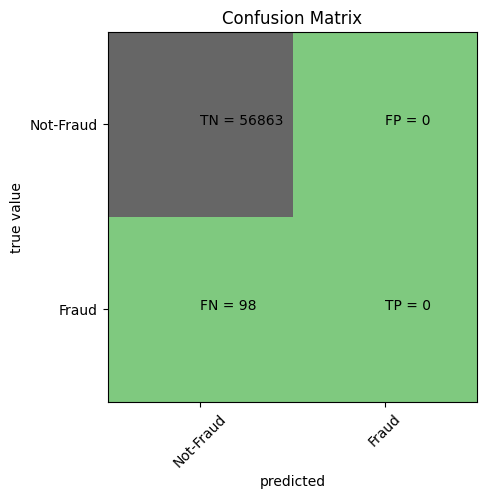

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.6124317057072728
l2 threshold: 0.4984930099267635
roc for the test dataset 61.2%


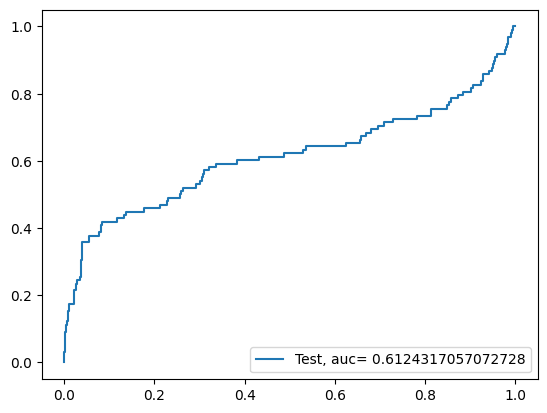

l1 roc_value: 0.6140392213723855
l1 threshold: 0.4402249904851002
roc for the test dataset 61.4%


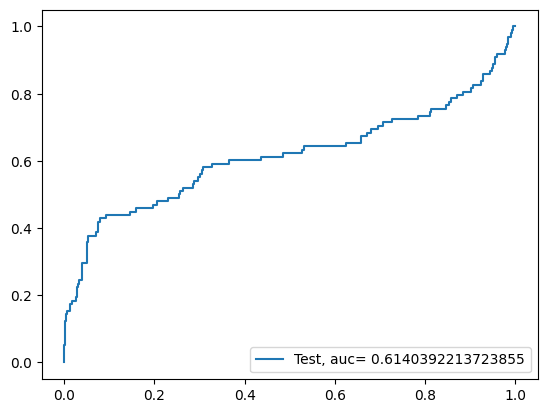

time taken: ----- 89.0984320640564 seconds ----- 
............................................................
KNN
score: 0.9991924299081828
accuracy of the KNN model: 0.9991924299081828
confusion matrix


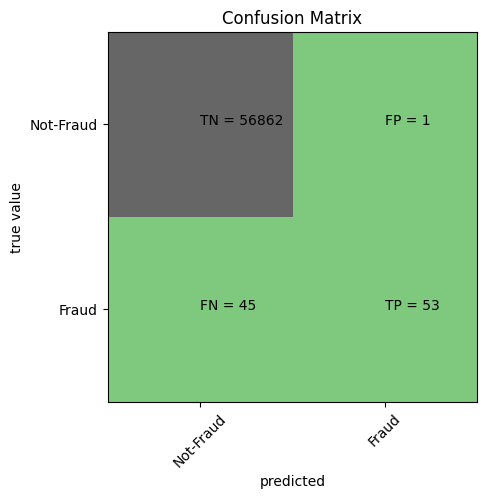

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.98      0.54      0.70        98

    accuracy                           1.00     56961
   macro avg       0.99      0.77      0.85     56961
weighted avg       1.00      1.00      1.00     56961

knn roc_value: 0.8057457828285457
knn threshold: 0.2
roc for the test dataset 80.6%


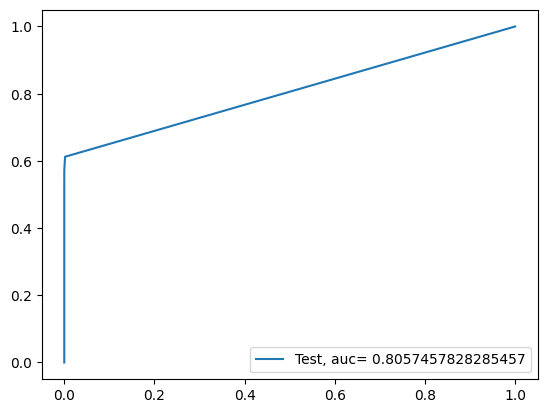

time taken: ----- 227.49549269676208 seconds ----- 
............................................................
Decision tree model, 'gini' and 'entropy'
score: 0.998841312476958
confusion matrix


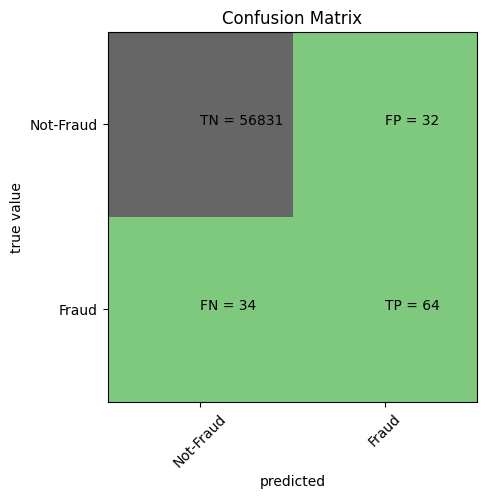

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.67      0.65      0.66        98

    accuracy                           1.00     56961
   macro avg       0.83      0.83      0.83     56961
weighted avg       1.00      1.00      1.00     56961

tree roc_value: 0.8262492341959029
tree threshold: 1.0
roc for the test dataset 82.6%


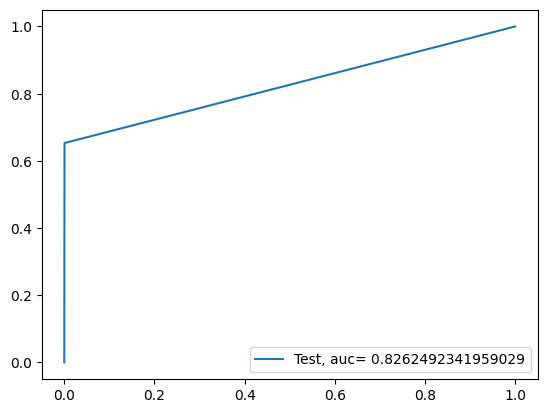

score: 0.9990168711925703
confusion matrix


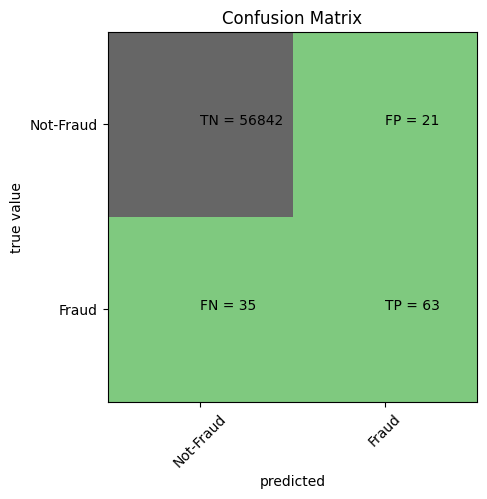

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.75      0.64      0.69        98

    accuracy                           1.00     56961
   macro avg       0.87      0.82      0.85     56961
weighted avg       1.00      1.00      1.00     56961

tree roc_value: 0.8212439170839185
tree threshold: 1.0
roc for the test dataset 82.1%


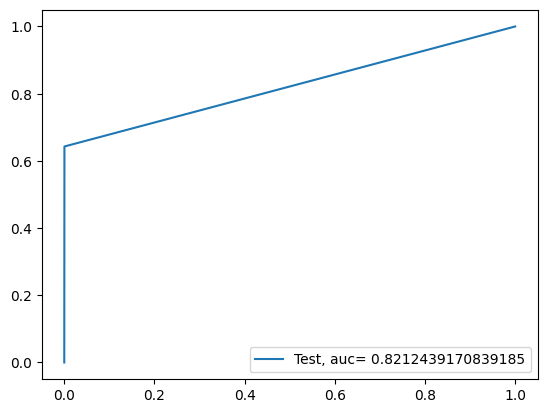

time taken: ----- 38.48223948478699 seconds ----- 
............................................................
XGBoost
score: 0.9994382121100402
confusion matrix


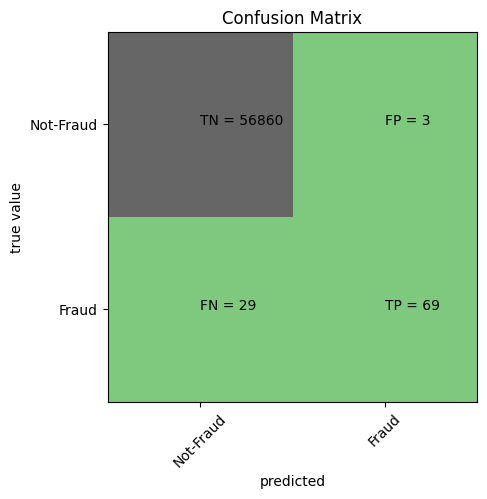

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.96      0.70      0.81        98

    accuracy                           1.00     56961
   macro avg       0.98      0.85      0.91     56961
weighted avg       1.00      1.00      1.00     56961

xgb roc_value: 0.9722049451474309
xgb threshold: 3.768169699469581e-05
roc for the test dataset 97.2%


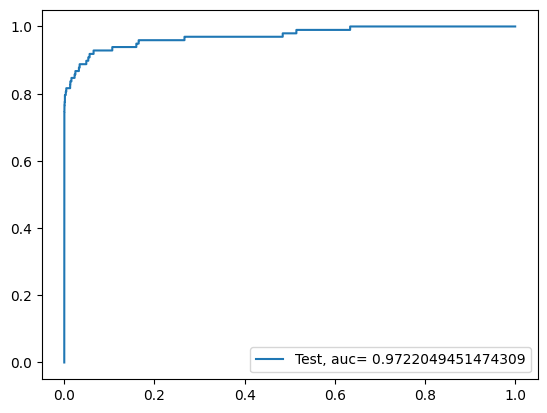

time taken: ----- 4.93756890296936 seconds ----- 
............................................................


In [65]:
# now we will call each model, and compare the results
print("Logistic Regression with L1 and L2 regularization")
start_time = time.time()
df_results = Logistic_model(df_results, "StratifiedKFold", x_train_skf_cv, y_train_skf_cv, x_test_skf_cv, y_test_skf_cv)
print("time taken: ----- %s seconds ----- "% (time.time() - start_time))
print("."*60)

# KNN
print("KNN")
start_time = time.time()
df_results = KNN_model(df_results, "StratifiedKFold", x_train_skf_cv, y_train_skf_cv, x_test_skf_cv, y_test_skf_cv)
print("time taken: ----- %s seconds ----- "% (time.time() - start_time))
print("."*60)

# Decision tree model, 'gini' and 'entropy'
print("Decision tree model, 'gini' and 'entropy'")
start_time = time.time()
df_results = tree_model(df_results, "StratifiedKFold", x_train_skf_cv, y_train_skf_cv, x_test_skf_cv, y_test_skf_cv)
print("time taken: ----- %s seconds ----- "% (time.time() - start_time))
print("."*60)

# XGBoost
print("XGBoost")
start_time = time.time()
df_results = XGBoost_model(df_results, "StratifiedKFold", x_train_skf_cv, y_train_skf_cv, x_test_skf_cv, y_test_skf_cv)
print("time taken: ----- %s seconds ----- "% (time.time() - start_time))
print("."*60)

# **Model Building with balancing classes**
**perform class balancing with: **

*   Random Oversampling
*   SMOTE
*   ADASYN





# Over_sampler

In [66]:
# oversampling using Random oversampler with stratified kfold cross validation

from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler

# Initialize StratifiedKFold with 5 splits
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=True)

# Initialize RandomOverSampler
ROS = RandomOverSampler(sampling_strategy=0.5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(x, y), 1):
    x_train_ros, x_test_ros = x.iloc[train_index], x.iloc[test_index]
    y_train_ros, y_test_ros = y.iloc[train_index], y.iloc[test_index]

    # Apply RandomOverSampler to the training data
    x_over, y_over = ROS.fit_resample(x_train_ros, y_train_ros)

# Convert resampled data to DataFrame if needed
x_over = pd.DataFrame(data=x_over, columns=x.columns)


Logistic Regression with L1 and L2 regularization
max auc_roc for l1:  0.8922803599969906
max auc_roc for l2:  0.8974229565958319
Parameters for l1 regularisations: 
[[-8.98098561e-03  6.53121207e-03 -1.40823407e-02  9.86355855e-03
  -5.40804168e-03 -2.85076427e-03 -1.00662099e-02  1.08971604e-03
  -5.16276333e-03 -1.14750261e-02  8.11352520e-03 -1.31098616e-02
  -3.08426192e-04 -1.57279738e-02 -1.35882503e-06 -8.22982360e-03
  -1.33564006e-02 -3.97419276e-03  1.35964079e-03  7.70243021e-04
   1.64442071e-03 -5.12280209e-05 -1.93897223e-04 -2.78612917e-04
   4.09056423e-05  1.15631385e-04  5.22919559e-04  1.93916349e-04
  -1.58110891e-04 -3.15940292e-02]]
[-0.00301515]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.55355776,
        0.72634952, 0.77835777, 0.80166955, 0.8215847 , 0.83724246,
        0.84923631, 0.85797982, 0.86509607, 0.87138318, 0.87642151,
        0.88056314, 0.88408803, 0.88671703, 0.88901854, 0.89117327],
       [0.5       , 0.5       , 0.5       , 0

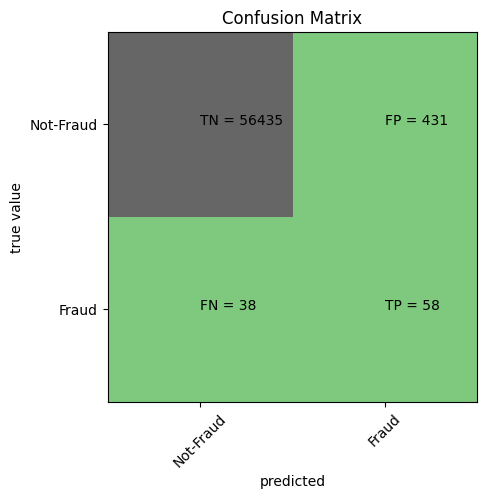

classification report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56866
           1       0.12      0.60      0.20        96

    accuracy                           0.99     56962
   macro avg       0.56      0.80      0.60     56962
weighted avg       1.00      0.99      0.99     56962

accuracy of the logistic model with l1 regularization: 0.9925037744461219
confusion matrix


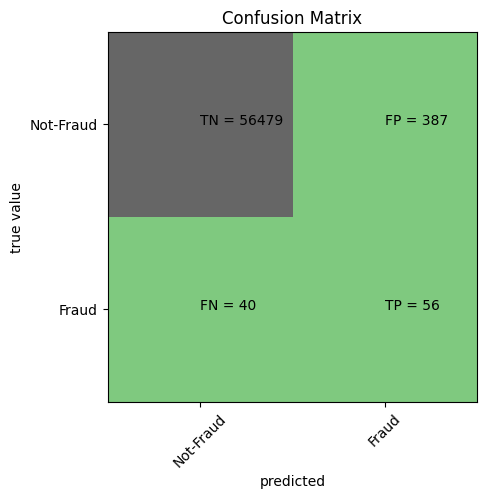

classification report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56866
           1       0.13      0.58      0.21        96

    accuracy                           0.99     56962
   macro avg       0.56      0.79      0.60     56962
weighted avg       1.00      0.99      0.99     56962

l2 roc_value: 0.8666849479478071
l2 threshold: 0.4307431076238284
roc for the test dataset 86.7%


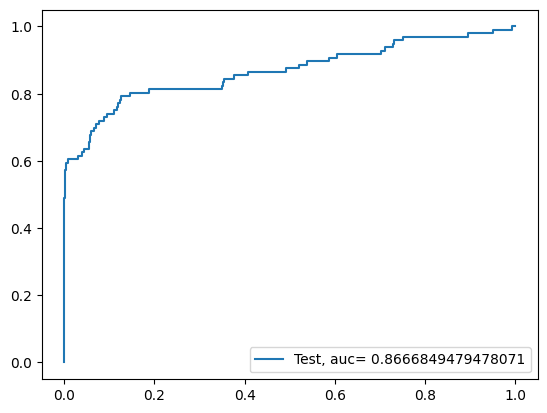

l1 roc_value: 0.8644279973973903
l1 threshold: 0.4376982734564088
roc for the test dataset 86.4%


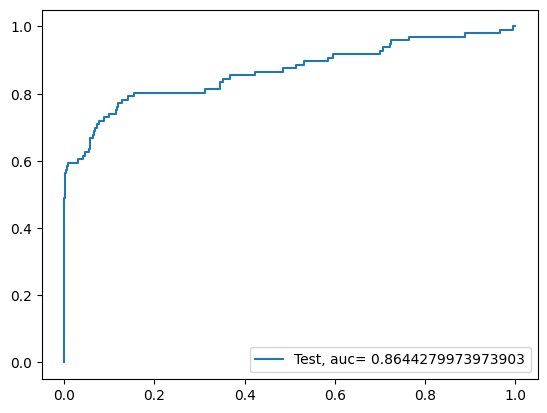

time taken: ----- 137.47829937934875 seconds ----- 
............................................................
KNN
score: 0.999403110845827
accuracy of the KNN model: 0.999403110845827
confusion matrix


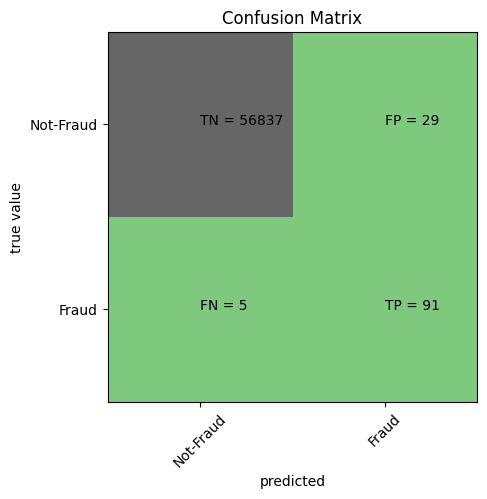

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.76      0.95      0.84        96

    accuracy                           1.00     56962
   macro avg       0.88      0.97      0.92     56962
weighted avg       1.00      1.00      1.00     56962

knn roc_value: 0.9791238027409466
knn threshold: 0.4
roc for the test dataset 97.9%


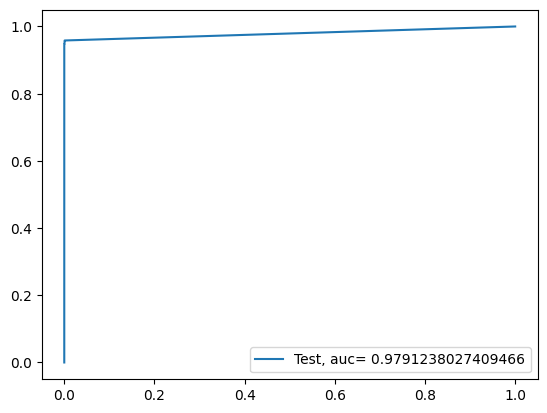

time taken: ----- 338.9830048084259 seconds ----- 
............................................................
Decision tree model, 'gini' and 'entropy'
score: 0.9997893332397036
confusion matrix


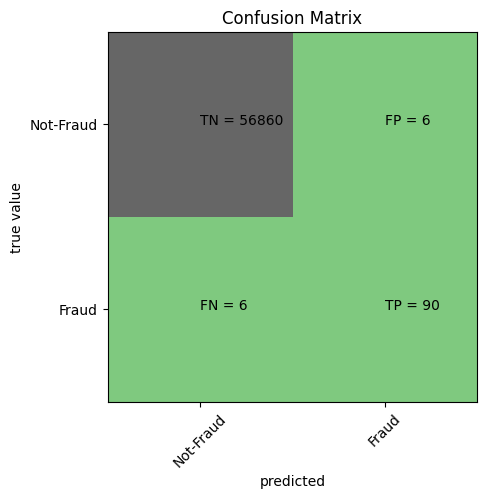

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.94      0.94      0.94        96

    accuracy                           1.00     56962
   macro avg       0.97      0.97      0.97     56962
weighted avg       1.00      1.00      1.00     56962

tree roc_value: 0.9686972443991138
tree threshold: 1.0
roc for the test dataset 96.9%


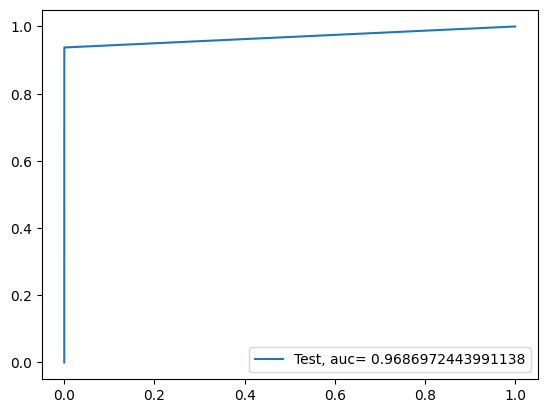

score: 0.9998244443664197
confusion matrix


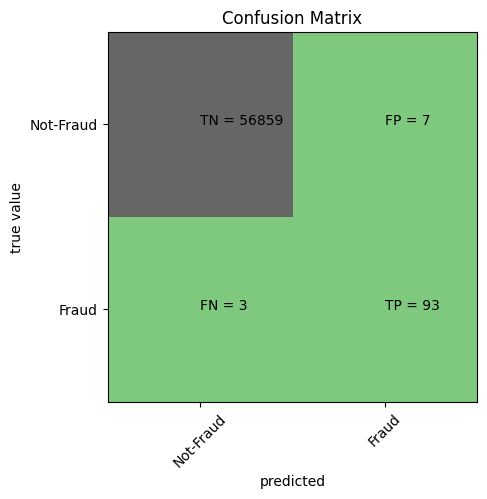

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.93      0.97      0.95        96

    accuracy                           1.00     56962
   macro avg       0.96      0.98      0.97     56962
weighted avg       1.00      1.00      1.00     56962

tree roc_value: 0.9843134517989661
tree threshold: 1.0
roc for the test dataset 98.4%


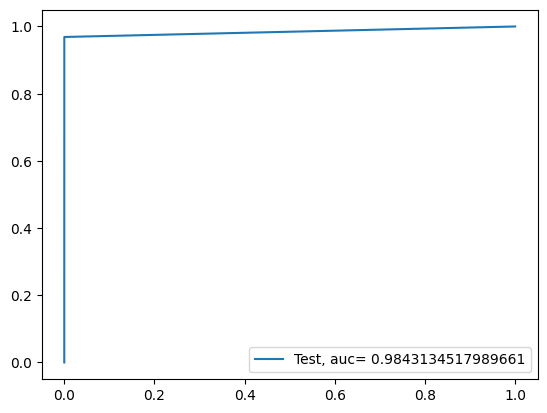

time taken: ----- 28.324805736541748 seconds ----- 
............................................................
XGBoost
score: 0.9998419999297777
confusion matrix


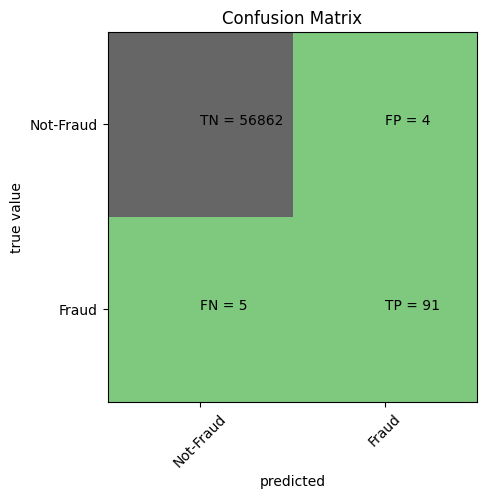

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.96      0.95      0.95        96

    accuracy                           1.00     56962
   macro avg       0.98      0.97      0.98     56962
weighted avg       1.00      1.00      1.00     56962

xgb roc_value: 0.998530536700313
xgb threshold: 0.0017728040693327785
roc for the test dataset 99.9%


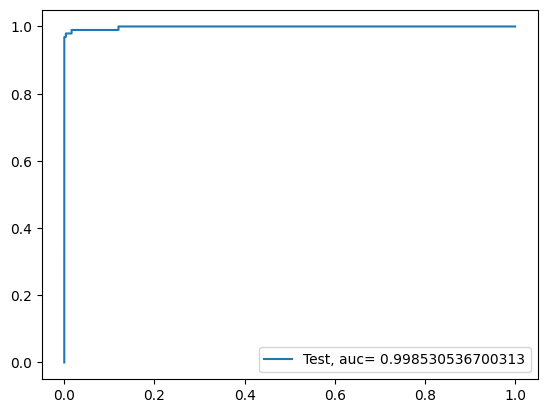

time taken: ----- 9.930118083953857 seconds ----- 
............................................................


In [67]:
# now we will call each model, and compare the results
print("Logistic Regression with L1 and L2 regularization")
start_time = time.time()
df_results = Logistic_model(df_results, "Random Oversampling with stratifiedkfold cv", x_over, y_over, x_test, y_test)
print("time taken: ----- %s seconds ----- "% (time.time() - start_time))
print("."*60)

# KNN
print("KNN")
start_time = time.time()
df_results = KNN_model(df_results, "Random Oversampling with stratifiedkfold cv", x_over, y_over, x_test, y_test)
print("time taken: ----- %s seconds ----- "% (time.time() - start_time))
print("."*60)

# Decision tree model, 'gini' and 'entropy'
print("Decision tree model, 'gini' and 'entropy'")
start_time = time.time()
df_results = tree_model(df_results, "Random Oversampling with stratifiedkfold cv", x_over, y_over, x_test, y_test)
print("time taken: ----- %s seconds ----- "% (time.time() - start_time))
print("."*60)

# XGBoost
print("XGBoost")
start_time = time.time()
df_results = XGBoost_model(df_results, "Random Oversampling with stratifiedkfold cv", x_over, y_over, x_test, y_test)
print("time taken: ----- %s seconds ----- "% (time.time() - start_time))
print("."*60)

In [68]:
df_results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold,logistic model with l2 regularization,0.998525,0.570575,0.498420
1,RepeatedKFold,logistic model with l1 regularization,0.998525,0.570149,0.477435
2,RepeatedKFold,KNN,0.999280,0.868861,0.200000
3,RepeatedKFold,Tree model with gini criteria,0.999315,0.880785,1.000000
4,RepeatedKFold,Tree model with entropy criteria,0.999298,0.874833,1.000000
5,RepeatedKFold,XGBoost,0.999614,0.977172,0.000190
6,StratifiedKFold,logistic model with l2 regularization,0.998280,0.612432,0.498493
7,StratifiedKFold,logistic model with l1 regularization,0.998280,0.614039,0.440225
8,StratifiedKFold,KNN,0.999192,0.805746,0.200000
9,StratifiedKFold,Tree model with gini criteria,0.998841,0.826249,1.000000


# SMOTE

In [76]:
# oversampling using Random SMOTE with stratified kfold cross validation

from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE


# Initialize StratifiedKFold with 5 splits
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=True)

# Initialize SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(x, y), 1):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE to the training data
    x_smote, y_smote = smote.fit_resample(x_train, y_train)

    # Convert resampled data to DataFrame if needed
x_smote = pd.DataFrame(data=x_smote, columns=x.columns)

Logistic Regression with L1 and L2 regularization
max auc_roc for l1:  0.9024952103046818
max auc_roc for l2:  0.9082956919804017
Parameters for l1 regularisations: 
[[-8.94078313e-03  7.02248744e-03 -1.42104744e-02  9.72758751e-03
  -5.87095136e-03 -2.69758398e-03 -1.02920806e-02  7.77199046e-04
  -5.28444940e-03 -1.16562794e-02  8.02809372e-03 -1.29608851e-02
  -4.00350128e-04 -1.56938168e-02 -4.94418001e-05 -8.23807489e-03
  -1.33044672e-02 -4.06281673e-03  1.11134033e-03  7.66535465e-04
   1.78389540e-03 -1.37189723e-04 -9.45778753e-05 -2.63834102e-04
   1.41443944e-04  1.02319534e-04  4.88862098e-04  2.03703014e-04
  -2.52277894e-04 -3.19237613e-02]]
[-0.00299117]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.54942789,
        0.71669502, 0.7692319 , 0.7979486 , 0.8200836 , 0.83838996,
        0.85330576, 0.86424957, 0.87222823, 0.87839956, 0.88396116,
        0.88882754, 0.89269975, 0.89612007, 0.89888337, 0.90138876],
       [0.5       , 0.5       , 0.5       , 0

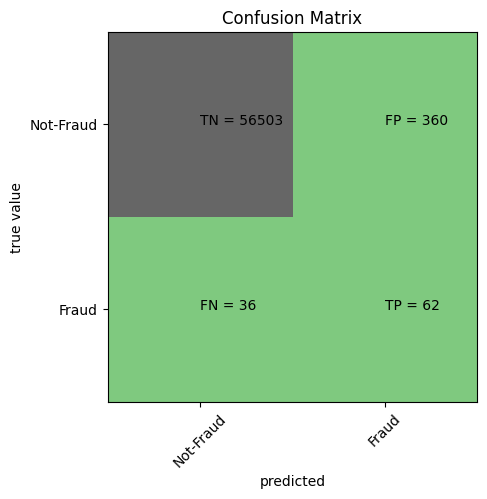

classification report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.15      0.63      0.24        98

    accuracy                           0.99     56961
   macro avg       0.57      0.81      0.62     56961
weighted avg       1.00      0.99      1.00     56961

accuracy of the logistic model with l1 regularization: 0.9937501097241973
confusion matrix


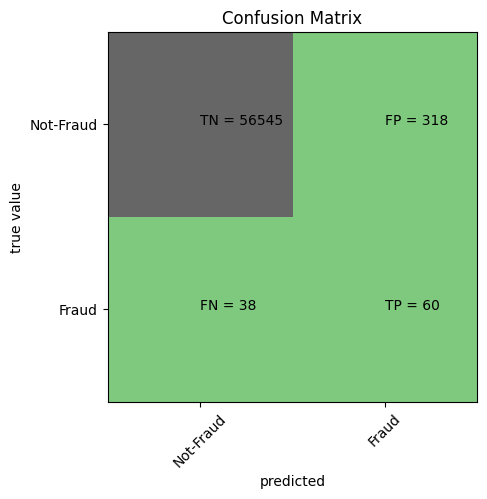

classification report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.16      0.61      0.25        98

    accuracy                           0.99     56961
   macro avg       0.58      0.80      0.62     56961
weighted avg       1.00      0.99      1.00     56961

l2 roc_value: 0.8858443153917741
l2 threshold: 0.4487427558461349
roc for the test dataset 88.6%


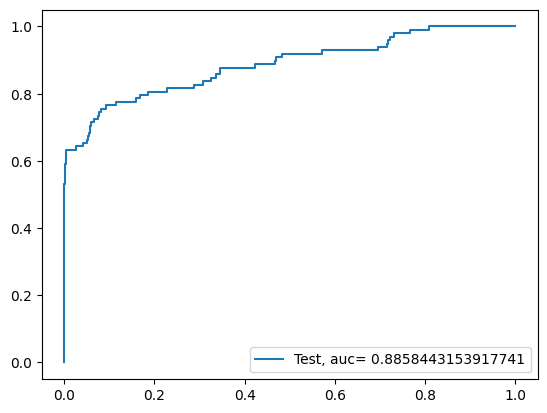

l1 roc_value: 0.8815342784142481
l1 threshold: 0.4546491536872531
roc for the test dataset 88.2%


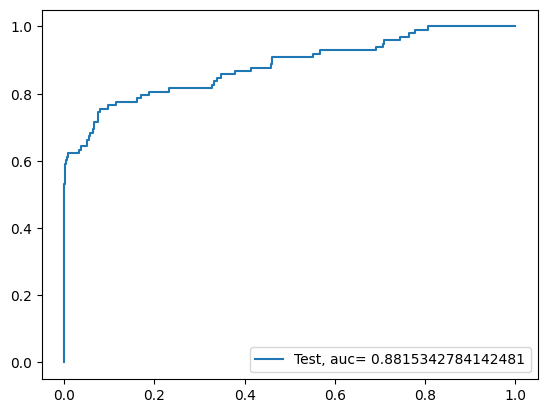

time taken: ----- 139.80963277816772 seconds ----- 
............................................................
KNN
score: 0.9960499288987201
accuracy of the KNN model: 0.9960499288987201
confusion matrix


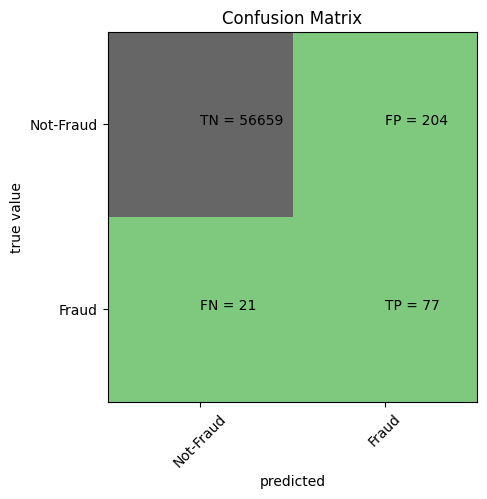

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.27      0.79      0.41        98

    accuracy                           1.00     56961
   macro avg       0.64      0.89      0.70     56961
weighted avg       1.00      1.00      1.00     56961

knn roc_value: 0.9069363636983556
knn threshold: 0.2
roc for the test dataset 90.7%


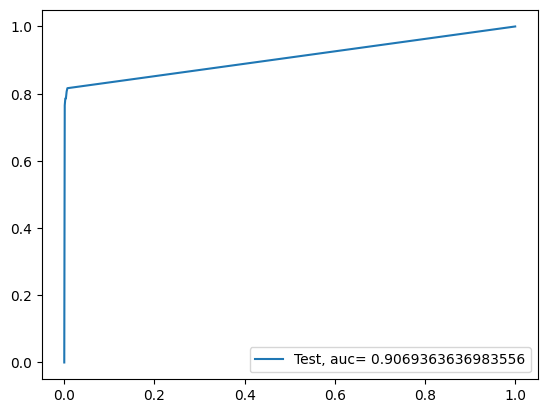

time taken: ----- 337.61935663223267 seconds ----- 
............................................................
Decision tree model, 'gini' and 'entropy'
score: 0.9974719544951809
confusion matrix


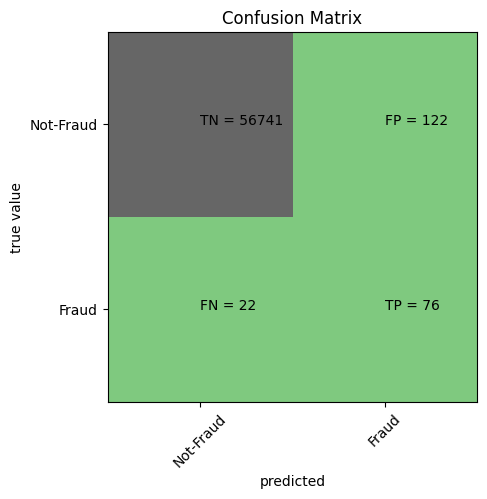

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.38      0.78      0.51        98

    accuracy                           1.00     56961
   macro avg       0.69      0.89      0.76     56961
weighted avg       1.00      1.00      1.00     56961

tree roc_value: 0.886682348229023
tree threshold: 1.0
roc for the test dataset 88.7%


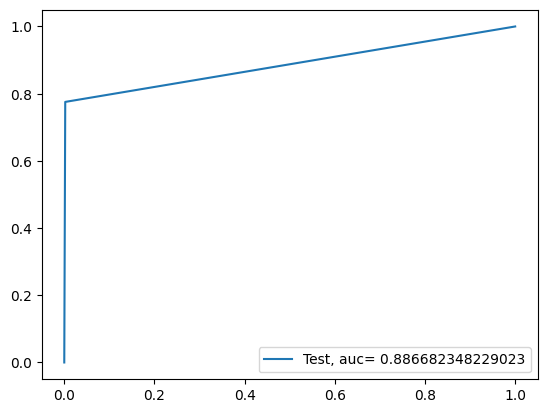

score: 0.9978581836695283
confusion matrix


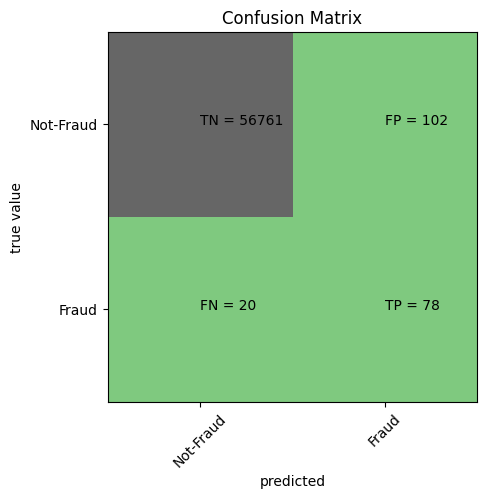

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.43      0.80      0.56        98

    accuracy                           1.00     56961
   macro avg       0.72      0.90      0.78     56961
weighted avg       1.00      1.00      1.00     56961

tree roc_value: 0.8970622911422979
tree threshold: 1.0
roc for the test dataset 89.7%


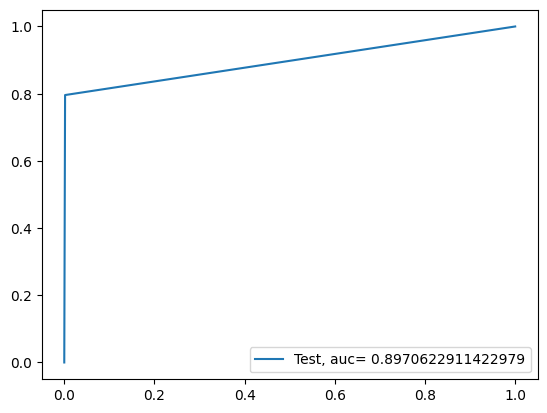

time taken: ----- 53.76669692993164 seconds ----- 
............................................................
XGBoost
score: 0.9994557679816014
confusion matrix


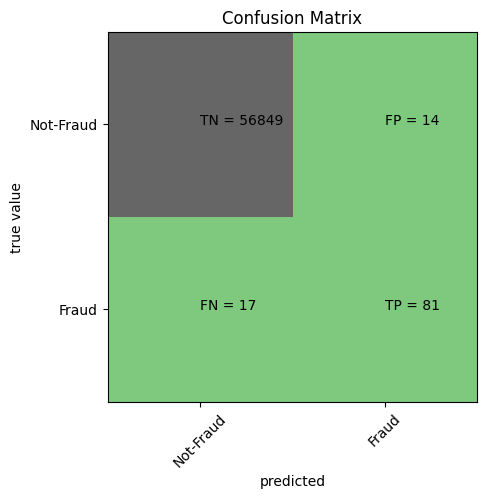

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.85      0.83      0.84        98

    accuracy                           1.00     56961
   macro avg       0.93      0.91      0.92     56961
weighted avg       1.00      1.00      1.00     56961

xgb roc_value: 0.9759604807401391
xgb threshold: 0.00012570641411002725
roc for the test dataset 97.6%


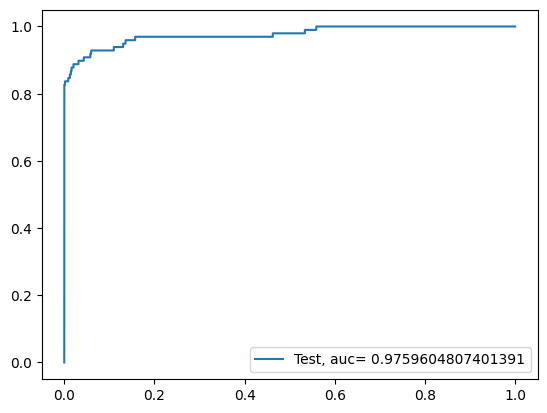

time taken: ----- 10.578484296798706 seconds ----- 
............................................................


In [77]:
# now we will call each model, and compare the results
print("Logistic Regression with L1 and L2 regularization")
start_time = time.time()
df_results = Logistic_model(df_results, "SMOTE Oversampling with stratifiedkfold cv", x_smote, y_smote, x_test, y_test)
print("time taken: ----- %s seconds ----- "% (time.time() - start_time))
print("."*60)

# KNN
print("KNN")
start_time = time.time()
df_results = KNN_model(df_results, "SMOTE Oversampling with stratifiedkfold cv", x_smote, y_smote, x_test, y_test)
print("time taken: ----- %s seconds ----- "% (time.time() - start_time))
print("."*60)

# Decision tree model, 'gini' and 'entropy'
print("Decision tree model, 'gini' and 'entropy'")
start_time = time.time()
df_results = tree_model(df_results, "SMOTE Oversampling with stratifiedkfold cv", x_smote, y_smote, x_test, y_test)
print("time taken: ----- %s seconds ----- "% (time.time() - start_time))
print("."*60)

# XGBoost
print("XGBoost")
start_time = time.time()
df_results = XGBoost_model(df_results, "SMOTE Oversampling with stratifiedkfold cv", x_smote, y_smote, x_test, y_test)
print("time taken: ----- %s seconds ----- "% (time.time() - start_time))
print("."*60)

In [70]:
df_results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold,logistic model with l2 regularization,0.998525,0.570575,0.498420
1,RepeatedKFold,logistic model with l1 regularization,0.998525,0.570149,0.477435
2,RepeatedKFold,KNN,0.999280,0.868861,0.200000
3,RepeatedKFold,Tree model with gini criteria,0.999315,0.880785,1.000000
4,RepeatedKFold,Tree model with entropy criteria,0.999298,0.874833,1.000000
5,RepeatedKFold,XGBoost,0.999614,0.977172,0.000190
6,StratifiedKFold,logistic model with l2 regularization,0.998280,0.612432,0.498493
7,StratifiedKFold,logistic model with l1 regularization,0.998280,0.614039,0.440225
8,StratifiedKFold,KNN,0.999192,0.805746,0.200000
9,StratifiedKFold,Tree model with gini criteria,0.998841,0.826249,1.000000
